In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy
import lda
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA,LatentDirichletAllocation

from utils import read_json

%matplotlib inline
%load_ext autoreload
%autoreload 2

nlp = spacy.load('en_core_web_sm')

In [2]:
JSON_PATH = './ig_json/mid_clean_wonumber.json'

data = read_json(JSON_PATH)
captions = []
for id_dict in data['images']:
    tokens = ' '.join(id_dict['sentences'][0]['tokens'])
    captions.append(tokens)
len(captions)

122200

### 1. SpaCy Clean Text

In [3]:
docs = nlp.pipe(captions)
stopwords = nlp.Defaults.stop_words

In [4]:
clean_docs = []
for doc in docs:
    tokens = [i.lemma_ for i in doc if (i.lemma_ != '-PRON-') and (i.text not in stopwords)]
    sentence = ' '.join(tokens).strip()
    if sentence != '':
        clean_docs.append(sentence)

In [5]:
for i in [10, 84, 23, 876]:
    before = captions[i]
    after = clean_docs[i]
    print(f'before: {before} | after: {after}')

before: lacrosse phone action shot | after: lacrosse phone action shoot
before: looking dapper wedding | after: look dapper wedding
before: always getting caught with food in her mouth | after: get catch food mouth
before: state fair with my honey | after: spring sound t


### 2. Get BOW Features

In [17]:
vectorizer = CountVectorizer(min_df = 100, max_df = 0.6, stop_words = 'english')
X = vectorizer.fit_transform(clean_docs)
#assert X.shape[0] == len(captions)

In [18]:
X.shape

(120945, 760)

In [19]:
vocab = vectorizer.get_feature_names()
print(vocab[-10:])

['yellow', 'yep', 'yes', 'yesterday', 'yo', 'yoga', 'young', 'yum', 'yummy', 'yup']


In [20]:
captions[19], [vocab[i] for i in X[19].indices]

("things aren't always what they seem", ['thing'])

### 2. Find the Best No. of Topics

In [14]:
topic_ns = [3, 6, 9, 12]

stats_ls = []
for topic_n in topic_ns:
    tst_model = lda.LDA(
        n_topics = topic_n, 
        n_iter = 1500, 
        random_state = 1
    )
#     tst_model = LatentDirichletAllocation(
#         n_components = topic_n, max_iter = 5, 
#         learning_method = 'online', 
#         learning_offset = 50., random_state = 0
#     )
    tst_model.fit(X)
    stats = tst_model.loglikelihood()
    stats_ls.append(stats)

INFO:lda:n_documents: 122200
INFO:lda:vocab_size: 4556
INFO:lda:n_words: 400821
INFO:lda:n_topics: 3
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -3724282
INFO:lda:<10> log likelihood: -3172071
INFO:lda:<20> log likelihood: -3136476
INFO:lda:<30> log likelihood: -3104471
INFO:lda:<40> log likelihood: -3083696
INFO:lda:<50> log likelihood: -3072804
INFO:lda:<60> log likelihood: -3062924
INFO:lda:<70> log likelihood: -3056590
INFO:lda:<80> log likelihood: -3052137
INFO:lda:<90> log likelihood: -3046477
INFO:lda:<100> log likelihood: -3045218
INFO:lda:<110> log likelihood: -3041476
INFO:lda:<120> log likelihood: -3039780
INFO:lda:<130> log likelihood: -3037755
INFO:lda:<140> log likelihood: -3036504
INFO:lda:<150> log likelihood: -3035129
INFO:lda:<160> log likelihood: -3033274
INFO:lda:<170> log likelihood: -3031919
INFO:lda:<180> log likelihood: -3031343
INFO:lda:<190> log likelihood: -3030634
INFO:lda:<200> log likelihood: -3029800
INFO:lda:<210> log likelihood: -3029518
INFO:lda

INFO:lda:<450> log likelihood: -3069629
INFO:lda:<460> log likelihood: -3068310
INFO:lda:<470> log likelihood: -3069421
INFO:lda:<480> log likelihood: -3069123
INFO:lda:<490> log likelihood: -3069435
INFO:lda:<500> log likelihood: -3069456
INFO:lda:<510> log likelihood: -3068838
INFO:lda:<520> log likelihood: -3069279
INFO:lda:<530> log likelihood: -3068774
INFO:lda:<540> log likelihood: -3069345
INFO:lda:<550> log likelihood: -3068940
INFO:lda:<560> log likelihood: -3068535
INFO:lda:<570> log likelihood: -3069395
INFO:lda:<580> log likelihood: -3069226
INFO:lda:<590> log likelihood: -3069456
INFO:lda:<600> log likelihood: -3070616
INFO:lda:<610> log likelihood: -3068950
INFO:lda:<620> log likelihood: -3069503
INFO:lda:<630> log likelihood: -3068194
INFO:lda:<640> log likelihood: -3068359
INFO:lda:<650> log likelihood: -3067563
INFO:lda:<660> log likelihood: -3068338
INFO:lda:<670> log likelihood: -3068345
INFO:lda:<680> log likelihood: -3068530
INFO:lda:<690> log likelihood: -3069599


INFO:lda:<940> log likelihood: -3087859
INFO:lda:<950> log likelihood: -3086454
INFO:lda:<960> log likelihood: -3087049
INFO:lda:<970> log likelihood: -3087249
INFO:lda:<980> log likelihood: -3086210
INFO:lda:<990> log likelihood: -3085326
INFO:lda:<1000> log likelihood: -3086660
INFO:lda:<1010> log likelihood: -3086756
INFO:lda:<1020> log likelihood: -3085555
INFO:lda:<1030> log likelihood: -3087554
INFO:lda:<1040> log likelihood: -3086829
INFO:lda:<1050> log likelihood: -3086008
INFO:lda:<1060> log likelihood: -3085787
INFO:lda:<1070> log likelihood: -3086243
INFO:lda:<1080> log likelihood: -3085618
INFO:lda:<1090> log likelihood: -3086307
INFO:lda:<1100> log likelihood: -3086886
INFO:lda:<1110> log likelihood: -3086088
INFO:lda:<1120> log likelihood: -3086946
INFO:lda:<1130> log likelihood: -3086405
INFO:lda:<1140> log likelihood: -3086185
INFO:lda:<1150> log likelihood: -3085953
INFO:lda:<1160> log likelihood: -3085273
INFO:lda:<1170> log likelihood: -3085852
INFO:lda:<1180> log li

INFO:lda:<1420> log likelihood: -3103679
INFO:lda:<1430> log likelihood: -3104537
INFO:lda:<1440> log likelihood: -3104662
INFO:lda:<1450> log likelihood: -3104978
INFO:lda:<1460> log likelihood: -3103483
INFO:lda:<1470> log likelihood: -3103488
INFO:lda:<1480> log likelihood: -3104362
INFO:lda:<1490> log likelihood: -3103976
INFO:lda:<1499> log likelihood: -3105275


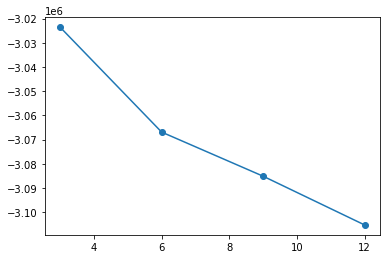

In [15]:
fig, ax = plt.subplots(1)
ax.plot(topic_ns, stats_ls, '-o');

### 3. Fit on Optimal no. of Topics and Show Topic Words

In [21]:
lda_model = lda.LDA(n_topics = 4, n_iter = 1500, random_state = 1)
lda_model.fit(X)

INFO:lda:n_documents: 120945
INFO:lda:vocab_size: 760
INFO:lda:n_words: 287189
INFO:lda:n_topics: 4
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -2413506
INFO:lda:<10> log likelihood: -2021789
INFO:lda:<20> log likelihood: -1998018
INFO:lda:<30> log likelihood: -1962221
INFO:lda:<40> log likelihood: -1930804
INFO:lda:<50> log likelihood: -1912464
INFO:lda:<60> log likelihood: -1899729
INFO:lda:<70> log likelihood: -1891020
INFO:lda:<80> log likelihood: -1887013
INFO:lda:<90> log likelihood: -1885806
INFO:lda:<100> log likelihood: -1883928
INFO:lda:<110> log likelihood: -1883617
INFO:lda:<120> log likelihood: -1882502
INFO:lda:<130> log likelihood: -1882494
INFO:lda:<140> log likelihood: -1882253
INFO:lda:<150> log likelihood: -1881492
INFO:lda:<160> log likelihood: -1880968
INFO:lda:<170> log likelihood: -1881170
INFO:lda:<180> log likelihood: -1880645
INFO:lda:<190> log likelihood: -1880348
INFO:lda:<200> log likelihood: -1881362
INFO:lda:<210> log likelihood: -1880553
INFO:lda:

In [22]:
topic_word = lda_model.topic_word_
n_top_words = 40
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}:\n {}\n\n'.format(i, ' '.join(topic_words)))

Topic 0:
 dinner username good night day lunch breakfast time happy love cake chocolate eat today birthday ice chicken sweet cream coffee food morning ready tonight date like make fresh cheese egg homemade green yum cookie tea hot yes home little snack


Topic 1:
 username new love day today happy year thank time birthday little photo hair old good come beautiful friend work fun christmas wedding great look family color favorite week weekend shoot ready party girl night book baby black wait white flower


Topic 2:
 day morning beautiful good today time walk night view love sunset beach sun weekend sky great light way like enjoy start summer work park look let home run rain fun city spring early blue evening snow username flower come afternoon


Topic 3:
 love like username look little good life know time baby work oh lol girl need thing big today think face right want let cute come feel miss boy dog home man cat sleep guy pretty play picture smile real true


